<a href="https://colab.research.google.com/github/nickwotton/MQP2019/blob/master/Nick's_Copy_of_linearfunction01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attempt to Improve Solving a Linear Function using a Nueral Network
Given code to use a neural network to fit a linear function, try to optimize the code to get a better fit, i.e. the data points completely overlap on the plot.

In [0]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

## Define the Function
Here we define our function $f(x)=ax+b$ with coefficient $a=1$ and intercept term $b=2$.
Then we test the equation with a test value of 2.

In [0]:
# target function
a = 1.
b = 2.
f = lambda x: a*x+b

#test
f(2.)

4.0

## Create Model
Next, we create the neural network model. This is done first by setting the inner and outer dimensions with variables. Next we code the model and vary the internal dimensions to attempt to improve the model. At this level, this is essentially a simple linear algebra exercise:

If we have input $x$, internal parameters $a,b$, and solution $f(x)$ then in the one-dimensional case we have:

\begin{equation}
  \left(
    a_{1}x+b_{2}
  \right)
  a_{2} + b_{2}
  = f(x)
\end{equation}
  
However, we want to get a better estimate for the true equation. So we increase the interior dimension which corresponds to the number of neurons inside the network. For example, we raised the inner dimension to 3. In matrix form we have:

\begin{equation}
\left(
  \begin{bmatrix} x \end{bmatrix} 
  \begin{bmatrix} a_{1} & a_{2} & a_{3} \end{bmatrix} 
  + 
  \begin{bmatrix} b_{1} & b_{2} & b_{3} \end{bmatrix}
\right)
 \begin{bmatrix} a_{4} \\ a_{5} \\ a_{6} \end{bmatrix}
 +
 \begin{bmatrix} b_{4} \\ \end{bmatrix}
 =
 \begin{bmatrix} f(x) \end{bmatrix}
\end{equation}

What we discovered here is that ReLU was slowing down the process, so since our function is Linear, we can just remove it. 

Additionally, we discerned that the higher the inner dimension, that is, the more nodes in each layer, the smaller the error and the better the performance.

In [0]:
#model
#nn.Linear
in_dim = 1
out_dim = 1

model = nn.Sequential(
    nn.Linear(in_dim, 30),
#    nn.ReLU(),
    nn.Linear(30, out_dim)
)

Here we define the Loss function as the Mean Squared Error(MSE). 

Note that by doing so, we are essentially 'cheating' the system. In most applications, we would not know the function $f$ so we would be unable to find the MSE.

In [0]:
#loss function 
criterion = nn.MSELoss()

Next we choose a learning rate and a method for learning. The learning rate is the percent of the data that is accepted in each iteration. The Methods we tried were SGD and Adam. 

In [0]:
#optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

## Train the Model

First we create the training data. This is a batch of random points that we pass through our function $f$.

In [0]:
#training data

batch_size = 1000

x_train = torch.randn(batch_size, 1)
y_train = f(x_train)


Once we have the training data, we pass this collection of inputs and solutions into the model. With each iteration we calculate the loss and attempt to optimize the model to further reduce the loss.

In this code we print out the loss every 500 iterations.

In [0]:
# Train the model

num_epochs = 10000

for epoch in range(num_epochs):

    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 500 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 
                                                    num_epochs, loss.item()))


Epoch [500/10000], Loss: 0.0000
Epoch [1000/10000], Loss: 0.0000
Epoch [1500/10000], Loss: 0.0000
Epoch [2000/10000], Loss: 0.0000
Epoch [2500/10000], Loss: 0.0000
Epoch [3000/10000], Loss: 0.0000
Epoch [3500/10000], Loss: 0.0000
Epoch [4000/10000], Loss: 0.0000
Epoch [4500/10000], Loss: 0.0000
Epoch [5000/10000], Loss: 0.0000
Epoch [5500/10000], Loss: 0.0000
Epoch [6000/10000], Loss: 0.0000
Epoch [6500/10000], Loss: 0.0000
Epoch [7000/10000], Loss: 0.0000
Epoch [7500/10000], Loss: 0.0000
Epoch [8000/10000], Loss: 0.0000
Epoch [8500/10000], Loss: 0.0000
Epoch [9000/10000], Loss: 0.0000
Epoch [9500/10000], Loss: 0.0000
Epoch [10000/10000], Loss: 0.0000


## Testing the Model
Now that we have a trained model with low Loss, we want to attempt to replicate the function. To do this we get another random sample of numbers. This sample is passed into both our fuction $f$ and the model.

We then graph both sets of points on a scatter plot. Since the model is highly accurate now, the two sets of points completely overlap.

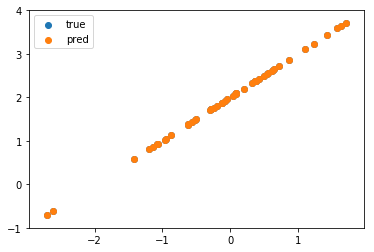

In [0]:
#test
x_ = torch.randn(50,1)
y_ = f(x_)
plt.scatter(x_.detach().numpy(), y_.detach().numpy(), label='true')

y_pred = model(x_)
plt.scatter(x_.detach().numpy(), y_pred.detach().numpy(), label='pred')

plt.legend()

__Todo__

- Improve the above code.
- train a model to $f(x) = x^2 + 1$
- train a model to 
$$f(x) = \begin{bmatrix} 
1 & 1 \\
0 & 1 
\end{bmatrix} x + 
\begin{bmatrix} 
1  \\
0  
\end{bmatrix}$$